<a href="https://colab.research.google.com/github/Eddychege/datascienceprojects/blob/main/financial_inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/Train.csv')
print(df.shape)

(23524, 13)


In [3]:
print(df.head())
print(df.describe())

  country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relativ

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


Text(0.5, 0, 'bank_account')

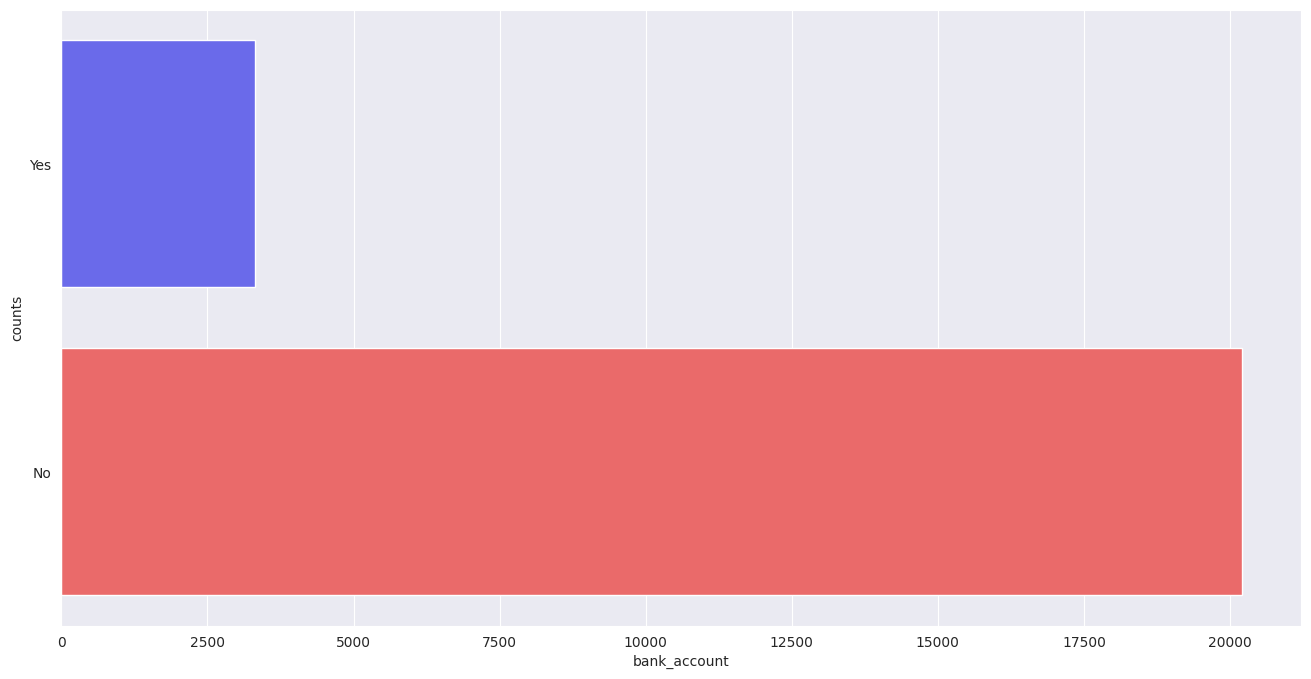

In [38]:
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams
import seaborn as sb
import numpy as np
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df['bank_account'].value_counts()
plt.figure(figsize=(16,8))
sb.countplot(df['bank_account'], palette='seismic')
plt.ylabel('counts')
plt.xlabel('bank_account')


Text(0.5, 0, 'country')

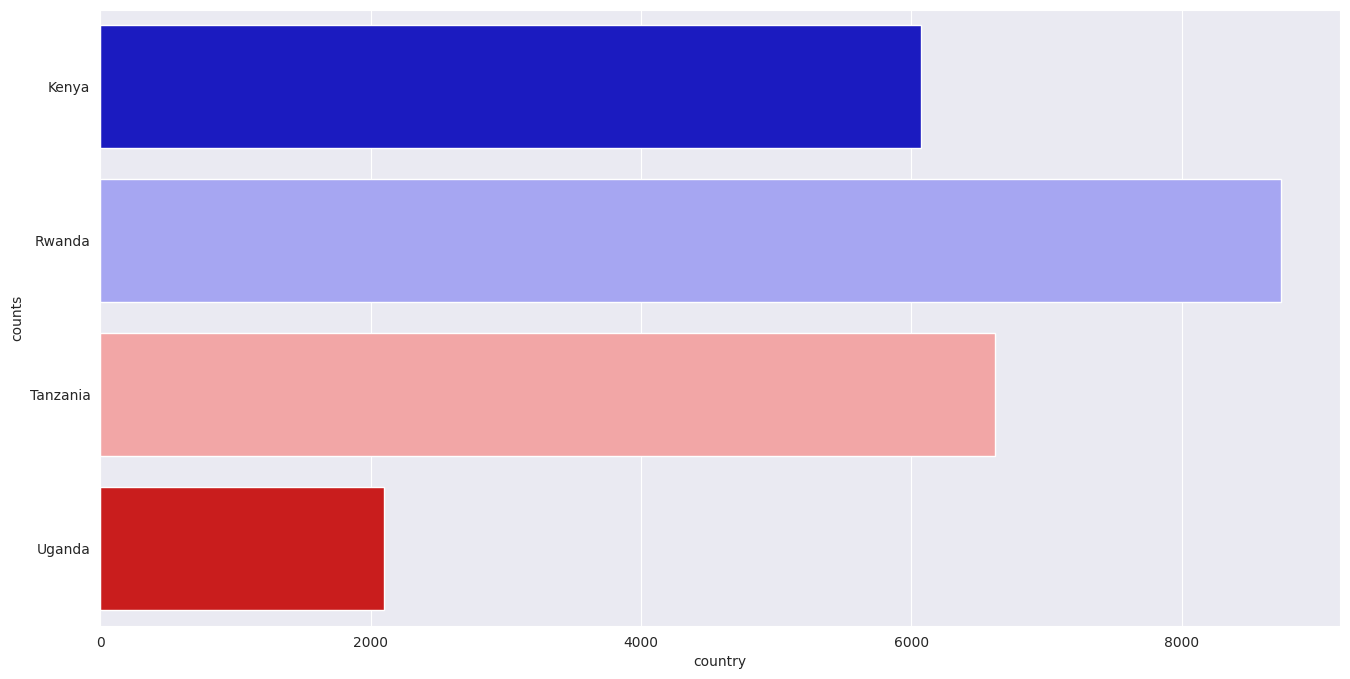

In [39]:
df.groupby('country')['bank_account'].value_counts()

plt.figure(figsize=(16,8))
sb.countplot(df['country'], palette='seismic')
plt.ylabel('counts')
plt.xlabel('country')

In [41]:
plt.figure(figsize=(16,8))
sb.countplot(df['country'], hue=df['bank_account'] ,palette='seismic')
plt.ylabel('counts')
plt.xlabel('year')

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1600x800 with 0 Axes>

In [7]:
df.groupby('gender_of_respondent')['bank_account'].value_counts()

gender_of_respondent  bank_account
Female                No              12395
                      Yes              1482
Male                  No               7817
                      Yes              1830
Name: count, dtype: int64

In [8]:
df.groupby('location_type')['bank_account'].value_counts()

location_type  bank_account
Rural          No              12672
               Yes              1671
Urban          No               7540
               Yes              1641
Name: count, dtype: int64

In [9]:
df.groupby('cellphone_access')['bank_account'].value_counts()

cellphone_access  bank_account
No                No               5966
                  Yes               104
Yes               No              14246
                  Yes              3208
Name: count, dtype: int64

In [10]:
df.groupby('marital_status')['bank_account'].value_counts()

marital_status           bank_account
Divorced/Seperated       No              1842
                         Yes              234
Dont know                No                 6
                         Yes                2
Married/Living together  No              8883
                         Yes             1866
Single/Never Married     No              7017
                         Yes              966
Widowed                  No              2464
                         Yes              244
Name: count, dtype: int64

In [11]:
df.groupby('job_type')['bank_account'].value_counts()

job_type                      bank_account
Dont Know/Refuse to answer    No               112
                              Yes               14
Farming and Fishing           No              4806
                              Yes              635
Formally employed Government  Yes              300
                              No                87
Formally employed Private     Yes              571
                              No               484
Government Dependent          No               197
                              Yes               50
Informally employed           No              5152
                              Yes              445
No Income                     No               614
                              Yes               13
Other Income                  No               884
                              Yes              196
Remittance Dependent          No              2287
                              Yes              240
Self employed                 No              5589
                              Yes              848
Name: count, dtype: int64

In [12]:
df.groupby('education_level')['bank_account'].value_counts()

education_level                  bank_account
No formal education              No               4339
                                 Yes               176
Other/Dont know/RTA              No                 24
                                 Yes                11
Primary education                No              11698
                                 Yes              1093
Secondary education              No               3240
                                 Yes               983
Tertiary education               Yes               591
                                 No                566
Vocational/Specialised training  Yes               458
                                 No                345
Name: count, dtype: int64

In [35]:
df.apply(lambda x: len(x.unique()))

,0
country,4
year,3
uniqueid,8735
bank_account,2
location_type,2
cellphone_access,2
household_size,20
age_of_respondent,85
gender_of_respondent,2
relationship_with_head,6


In [36]:
cat_columns = [col for col in df.select_dtypes('object').columns if col not in ['uniqueid']]
num_columns = [col for col in df.select_dtypes('int', 'float').columns ]

In [42]:
df[num_columns].apply(lambda x: len(x.unique()))

,0
year,3
household_size,20
age_of_respondent,85


In [44]:
df['year'].value_counts()

,count
year,
2016,8735
2018,8169
2017,6620


In [45]:
!git init https://github.com/Eddychege/datascienceprojects

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/https:/github.com/Eddychege/datascienceprojects/.git/


In [46]:
!git add .

fatal: not a git repository (or any of the parent directories): .git


In [47]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [48]:
!git clone https://github.com/Eddychege/datascienceprojects

Cloning into 'datascienceprojects'...
fatal: protocol '/content/https' is not supported


In [49]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [50]:
!git add financial_inclusion.ipynb

fatal: pathspec 'financial_inclusion.ipynb' did not match any files
